In [1]:
from google.colab import drive
drive.mount('/content/drive')
dir = '/content/drive/Shared drives/bds-final-project'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Mounted at /content/drive


In [2]:
from datetime import datetime

In [3]:
weather_data = pd.read_csv(f'{dir}/Austin_WeatherData_2018-20.csv', index_col=False)

In [4]:
weather_data.head()

,Date,Max_Temperature_F,Avg_Temperature_F,Min_Temperature_F,Max_DewPoint_F,Avg_DewPoint_F,Min_DewPoint_F,Max_Humidity_%,Avg_Humidity_%,Min_Humidity_%,Max_WindSpeed_mph,Avg_WindSpeed_mph,Min_WindSpeed_mph,Max_Pressure_Hg,Avg_Pressure_Hg,Min_Pressure_Hg,Precipitation_inches
0,4/1/2018,82,71.2,64,66,63.1,61,93,76.8,54,13,9.3,5,29.4,29.4,29.3,0.0
1,4/2/2018,85,70.8,58,67,62.7,54,90,76.7,51,20,9.7,0,29.3,29.3,29.1,0.0
2,4/3/2018,80,72.7,65,71,64.4,40,90,76.6,40,24,12.1,0,29.5,29.2,29.1,0.0
3,4/4/2018,70,59.8,50,49,35.1,30,80,41.6,26,28,13.5,0,29.7,29.6,29.5,0.0
4,4/5/2018,78,68.0,56,67,57.6,47,87,70.0,56,16,9.0,0,29.6,29.4,29.3,0.0


In [5]:
weather_data.dtypes

Date                     object
Max_Temperature_F         int64
Avg_Temperature_F       float64
Min_Temperature_F         int64
Max_DewPoint_F            int64
Avg_DewPoint_F          float64
Min_DewPoint_F            int64
Max_Humidity_%            int64
Avg_Humidity_%          float64
Min_Humidity_%            int64
Max_WindSpeed_mph         int64
Avg_WindSpeed_mph       float64
Min_WindSpeed_mph         int64
Max_Pressure_Hg         float64
Avg_Pressure_Hg         float64
Min_Pressure_Hg         float64
Precipitation_inches    float64
dtype: object

In [6]:
weather_data.shape

(963, 17)

In [7]:
def which_month(month_num):
  month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 
                5: 'May' ,6: 'Jun', 7: 'Jul',8:'Aug' ,9: 
                'Sept', 10: 'Oct', 11: 'Nov',12: 'Dec'}
  return month_dict[month_num]

weather_data['Date'] = pd.to_datetime(weather_data['Date'], infer_datetime_format=True) 

weather_data['Day'] = weather_data['Date'].dt.day
weather_data['Month'] = weather_data['Date'].dt.month
weather_data['Year'] = weather_data['Date'].dt.year
 
weather_data['Month_Year'] = weather_data.Month.apply(which_month) + '-' + weather_data.Year.apply(str)
weather_data.head()

,Date,Max_Temperature_F,Avg_Temperature_F,Min_Temperature_F,Max_DewPoint_F,Avg_DewPoint_F,Min_DewPoint_F,Max_Humidity_%,Avg_Humidity_%,Min_Humidity_%,Max_WindSpeed_mph,Avg_WindSpeed_mph,Min_WindSpeed_mph,Max_Pressure_Hg,Avg_Pressure_Hg,Min_Pressure_Hg,Precipitation_inches,Day,Month,Year,Month_Year
0,2018-04-01,82,71.2,64,66,63.1,61,93,76.8,54,13,9.3,5,29.4,29.4,29.3,0.0,1,4,2018,Apr-2018
1,2018-04-02,85,70.8,58,67,62.7,54,90,76.7,51,20,9.7,0,29.3,29.3,29.1,0.0,2,4,2018,Apr-2018
2,2018-04-03,80,72.7,65,71,64.4,40,90,76.6,40,24,12.1,0,29.5,29.2,29.1,0.0,3,4,2018,Apr-2018
3,2018-04-04,70,59.8,50,49,35.1,30,80,41.6,26,28,13.5,0,29.7,29.6,29.5,0.0,4,4,2018,Apr-2018
4,2018-04-05,78,68.0,56,67,57.6,47,87,70.0,56,16,9.0,0,29.6,29.4,29.3,0.0,5,4,2018,Apr-2018


In [8]:
monthly_timeframe = (weather_data[['Year', 'Month']].drop_duplicates()
                                            .sort_values(by=['Year', 'Month'])
                                            .reset_index(drop=True).reset_index()
                                            .rename(columns={'index':'Period'}))
monthly_timeframe.head(10)

,Period,Year,Month
0,0,2018,4
1,1,2018,5
2,2,2018,6
3,3,2018,7
4,4,2018,8
5,5,2018,9
6,6,2018,10
7,7,2018,11
8,8,2018,12
9,9,2019,1


In [9]:
weather_data = weather_data.merge(monthly_timeframe, on=['Year', 'Month'], how='left')

In [10]:
weather_data.head()

,Date,Max_Temperature_F,Avg_Temperature_F,Min_Temperature_F,Max_DewPoint_F,Avg_DewPoint_F,Min_DewPoint_F,Max_Humidity_%,Avg_Humidity_%,Min_Humidity_%,Max_WindSpeed_mph,Avg_WindSpeed_mph,Min_WindSpeed_mph,Max_Pressure_Hg,Avg_Pressure_Hg,Min_Pressure_Hg,Precipitation_inches,Day,Month,Year,Month_Year,Period
0,2018-04-01,82,71.2,64,66,63.1,61,93,76.8,54,13,9.3,5,29.4,29.4,29.3,0.0,1,4,2018,Apr-2018,0
1,2018-04-02,85,70.8,58,67,62.7,54,90,76.7,51,20,9.7,0,29.3,29.3,29.1,0.0,2,4,2018,Apr-2018,0
2,2018-04-03,80,72.7,65,71,64.4,40,90,76.6,40,24,12.1,0,29.5,29.2,29.1,0.0,3,4,2018,Apr-2018,0
3,2018-04-04,70,59.8,50,49,35.1,30,80,41.6,26,28,13.5,0,29.7,29.6,29.5,0.0,4,4,2018,Apr-2018,0
4,2018-04-05,78,68.0,56,67,57.6,47,87,70.0,56,16,9.0,0,29.6,29.4,29.3,0.0,5,4,2018,Apr-2018,0


In [11]:
#Calculating monthly average temperature
AvgTemp_data = weather_data[['Period','Month_Year','Avg_Temperature_F']]
AvgTemp_data = AvgTemp_data.groupby(['Month_Year','Period'])['Avg_Temperature_F'].mean().reset_index().sort_values(by='Period')
AvgTemp_data.head()

,Month_Year,Period,Avg_Temperature_F
0,Apr-2018,0,65.073333
20,May-2018,1,77.909677
15,Jun-2018,2,83.330000
12,Jul-2018,3,85.083871
3,Aug-2018,4,85.870968


Text(0.5, 1.0, 'Average Temperature by Month')

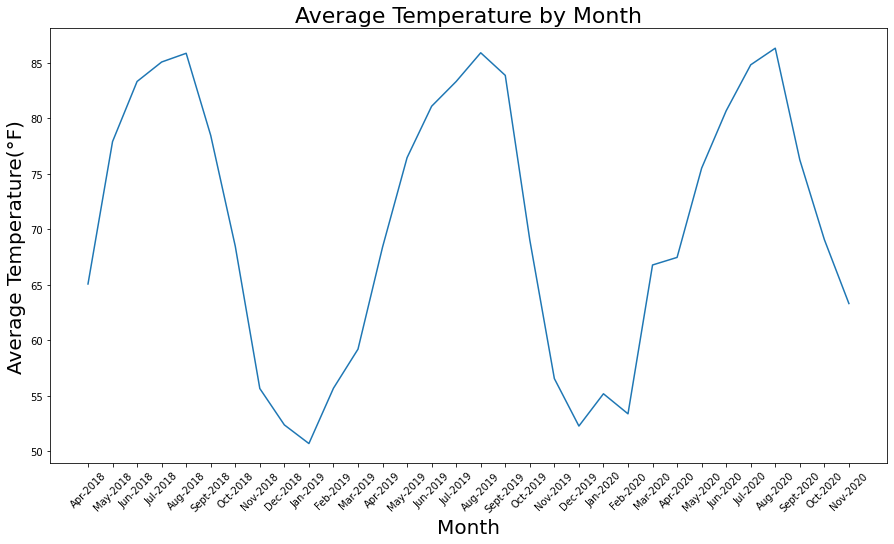

In [12]:
  #plotting monthly average temperature
  fig, ax = plt.subplots(figsize=(15, 8))
  sns.lineplot(data=AvgTemp_data, x='Period', y='Avg_Temperature_F',ax=ax)
  ax.set_xticks(AvgTemp_data['Period'])
  ax.set_xticklabels(AvgTemp_data['Month_Year'], rotation=45)
  ax.set_xlabel("Month", fontsize=20)
  #plt.legend()
  plt.ylabel("Average Temperature(\xb0F)", fontsize=20)
  plt.title('Average Temperature by Month', fontsize=22)

In [13]:
#Calculating monthly min and max temperature
MinTemp_data = weather_data[['Period','Month_Year','Min_Temperature_F']]
MinTemp_data = MinTemp_data.groupby(['Month_Year','Period'])['Min_Temperature_F'].mean().reset_index().rename(columns={'Min_Temperature_F':'Temp'}).sort_values(by='Period')
MinTemp_data['Category'] = 'Min'
#MinTemp_data.head()

MaxTemp_data = weather_data[['Period','Month_Year','Max_Temperature_F']]
MaxTemp_data = MaxTemp_data.groupby(['Month_Year','Period'])['Max_Temperature_F'].mean().reset_index().rename(columns={'Max_Temperature_F':'Temp'}).sort_values(by='Period')
MaxTemp_data['Category'] = 'Max'
#MaxTemp_data.head()

Text(0.5, 1.0, 'Minimum & Maximum Temperature by Month')

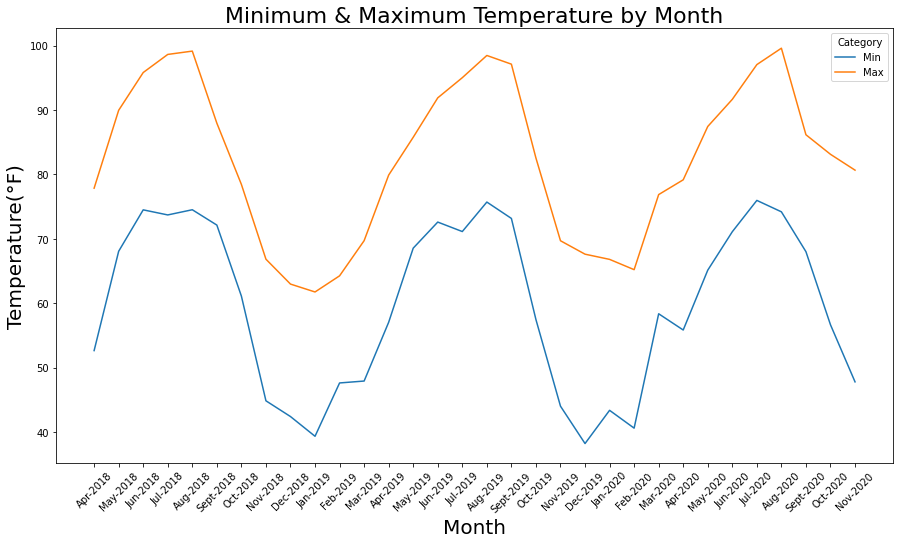

In [14]:
#plotting min and max temperature 
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=pd.concat([MinTemp_data, MaxTemp_data]), x='Period', y='Temp',hue='Category',ax=ax)
ax.set_xticks(MaxTemp_data['Period'])
ax.set_xticklabels(MaxTemp_data['Month_Year'], rotation=45)
ax.set_xlabel("Month", fontsize=20)
#plt.legend()
plt.ylabel("Temperature(\xb0F)", fontsize=20)
plt.title('Minimum & Maximum Temperature by Month', fontsize=22)

In [15]:
#calculating monthly average precipitation
AvgPrecep_data = weather_data[['Period','Month_Year','Precipitation_inches']]
AvgPrecep_data = AvgPrecep_data.groupby(['Month_Year','Period'])['Precipitation_inches'].mean().reset_index().sort_values(by='Period')
AvgPrecep_data.head()

,Month_Year,Period,Precipitation_inches
0,Apr-2018,0,0.032333
20,May-2018,1,0.104194
15,Jun-2018,2,0.020667
12,Jul-2018,3,0.040645
3,Aug-2018,4,0.027097


Text(0.5, 1.0, 'Average Precipitation by Month')

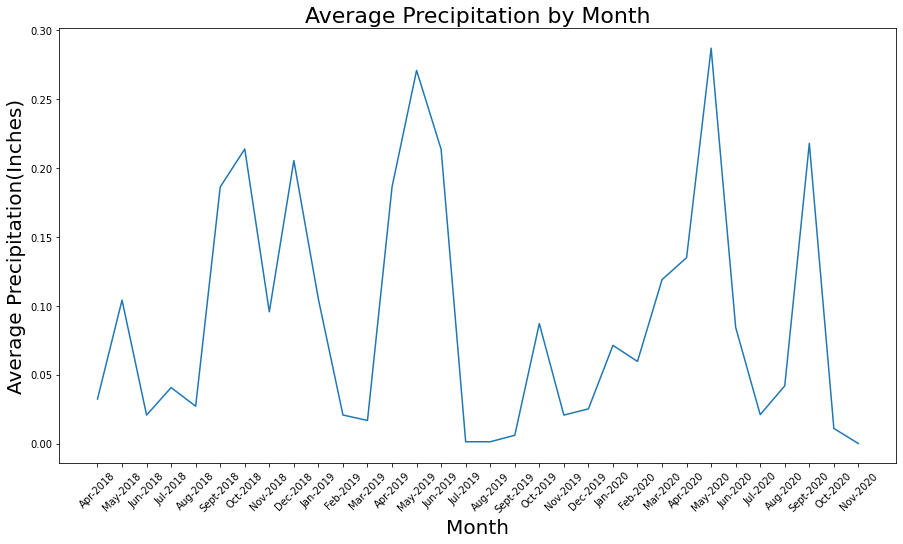

In [16]:
  #plotting monthly average precipitation
  fig, ax = plt.subplots(figsize=(15, 8))
  sns.lineplot(data=AvgPrecep_data, x='Period', y='Precipitation_inches',ax=ax)
  ax.set_xticks(AvgPrecep_data['Period'])
  ax.set_xticklabels(AvgPrecep_data['Month_Year'], rotation=45)
  ax.set_xlabel("Month", fontsize=20)
  #plt.legend()
  plt.ylabel("Average Precipitation(Inches)", fontsize=20)
  plt.title('Average Precipitation by Month', fontsize=22)

In [23]:
df_merged = pd.read_csv(f'{dir}/merged_data.csv', index_col=0)
print(df_merged.shape)
df_merged.head()

(1450, 23)


,date,day_of_week,avg_trip_duration,avg_trip_distance,num_bicycle_trips,num_moped_trips,num_scooter_trips,Max_Temperature_F,Avg_Temperature_F,Min_Temperature_F,Max_DewPoint_F,Avg_DewPoint_F,Min_DewPoint_F,Max_Humidity_%,Avg_Humidity_%,Min_Humidity_%,Max_WindSpeed_mph,Avg_WindSpeed_mph,Min_WindSpeed_mph,Max_Pressure_Hg,Avg_Pressure_Hg,Min_Pressure_Hg,Precipitation_inches
0,2018-04-03,2,943.000000,419.000000,0,0,1,80,72.7,65,71,64.4,40,90,76.6,40,24,12.1,0,29.5,29.2,29.1,0.00
1,2018-04-04,3,1360.333333,5691.333333,0,0,3,70,59.8,50,49,35.1,30,80,41.6,26,28,13.5,0,29.7,29.6,29.5,0.00
2,2018-04-05,4,1198.633929,2238.776786,0,0,112,78,68.0,56,67,57.6,47,87,70.0,56,16,9.0,0,29.6,29.4,29.3,0.00
3,2018-04-06,5,1118.914530,2616.518519,0,0,351,85,75.6,71,71,68.7,67,93,80.1,58,22,12.4,3,29.3,29.2,29.1,0.00
4,2018-04-07,6,970.707207,1815.882883,0,0,222,72,50.0,41,69,44.6,35,96,81.6,73,28,18.4,12,29.5,29.4,29.2,0.31


In [24]:
df_merged['num_trips'] = df_merged['num_bicycle_trips'] + df_merged['num_moped_trips'] + df_merged['num_scooter_trips']
df_merged.tail()

,date,day_of_week,avg_trip_duration,avg_trip_distance,num_bicycle_trips,num_moped_trips,num_scooter_trips,Max_Temperature_F,Avg_Temperature_F,Min_Temperature_F,Max_DewPoint_F,Avg_DewPoint_F,Min_DewPoint_F,Max_Humidity_%,Avg_Humidity_%,Min_Humidity_%,Max_WindSpeed_mph,Avg_WindSpeed_mph,Min_WindSpeed_mph,Max_Pressure_Hg,Avg_Pressure_Hg,Min_Pressure_Hg,Precipitation_inches,num_trips
1445,2020-11-14,5,844.764112,1831.127309,438,213,10935,88,76.2,66,69,66.0,61,91,73.2,42,18,9.5,0,29.4,29.3,29.2,0.0,11586
1446,2020-11-14,6,3053.381410,295615.108854,8,31,273,88,76.2,66,69,66.0,61,91,73.2,42,18,9.5,0,29.4,29.3,29.2,0.0,312
1447,2020-11-15,0,2980.400000,4465.690181,2,9,139,73,62.4,39,69,34.4,20,93,44.0,14,28,12.2,0,29.7,29.6,29.4,0.0,150
1448,2020-11-15,6,865.656728,10947.714433,396,239,11909,73,62.4,39,69,34.4,20,93,44.0,14,28,12.2,0,29.7,29.6,29.4,0.0,12544
1449,2020-11-16,0,734.447527,2319.936630,38,118,1502,76,51.9,35,36,30.2,23,82,52.3,14,6,1.5,0,29.8,29.7,29.7,0.0,1658


In [22]:
# data=df_merged[df_merged['num_trips'] < 40000]
# data.head()
#[df_merged['num_trips'] <= 40000]

Text(0.5, 1.0, 'Temperature vs Number of Trips')

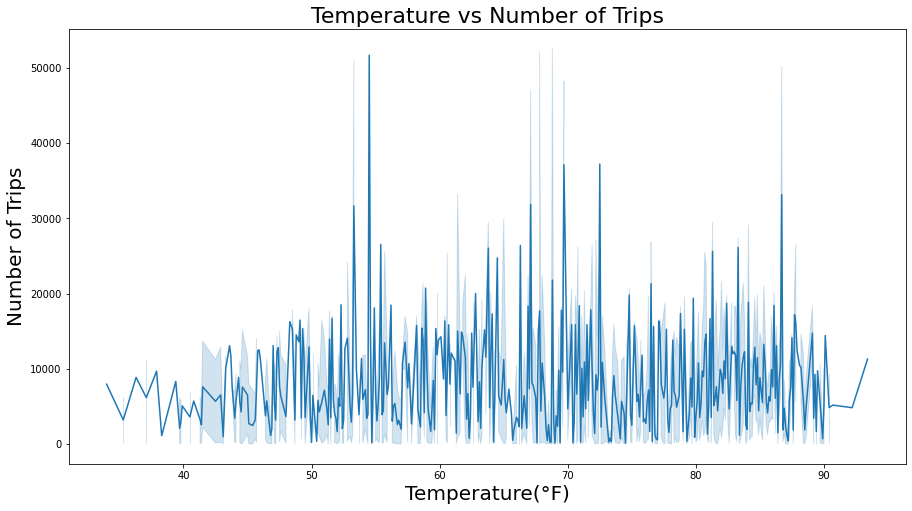

In [26]:
#plotting temeperature vs number of trips
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=df_merged, x='Avg_Temperature_F', y='num_trips',ax=ax)
#ax.set_xticks(AvgPrecep_data['Period'])
#ax.set_xticklabels(AvgPrecep_data['Month_Year'], rotation=45)
ax.set_xlabel("Temperature(\xb0F)", fontsize=20)
#plt.legend()
plt.ylabel("Number of Trips", fontsize=20)
plt.title('Temperature vs Number of Trips', fontsize=22)

Text(0.5, 1.0, 'Precipitation vs Number of Trips')

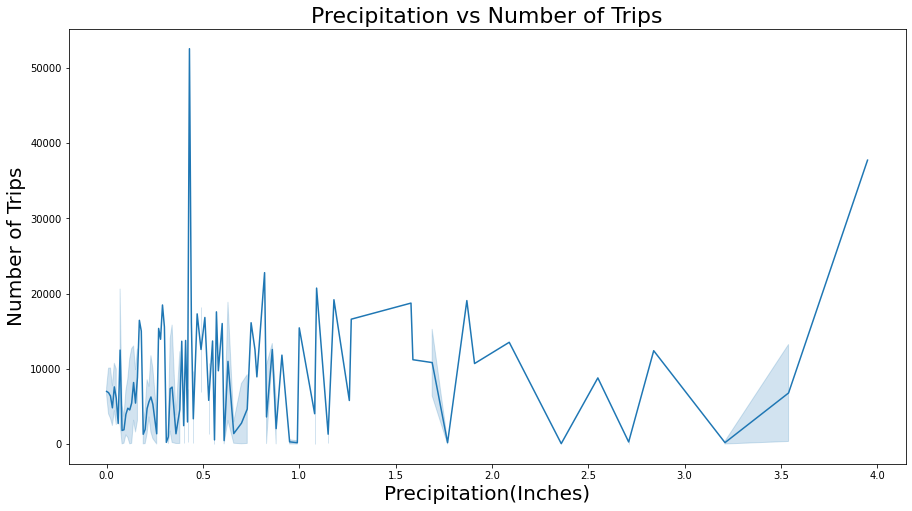

In [27]:
#plotting precipitation vs number of trips
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=df_merged, x='Precipitation_inches', y='num_trips',ax=ax)
#ax.set_xticks(AvgPrecep_data['Period'])
#ax.set_xticklabels(AvgPrecep_data['Month_Year'], rotation=45)
ax.set_xlabel("Precipitation(Inches)", fontsize=20)
#plt.legend()
plt.ylabel("Number of Trips", fontsize=20)
plt.title('Precipitation vs Number of Trips', fontsize=22)

In [29]:
# #plotting temperature vs precipitation
# fig, ax = plt.subplots(figsize=(15, 8))
# sns.lineplot(data=df_merged, x='Avg_Temperature_F', y='Precipitation_inches',ax=ax)
# #ax.set_xticks(AvgPrecep_data['Period'])
# #ax.set_xticklabels(AvgPrecep_data['Month_Year'], rotation=45)
# ax.set_xlabel("Temperature(\xb0F)", fontsize=20)
# #plt.legend()
# plt.ylabel("Precipitation(Inches)", fontsize=20)
# plt.title('Temperature vs Precipitation', fontsize=22)

Text(0.5, 1.0, 'Dew Point vs Number of Trips')

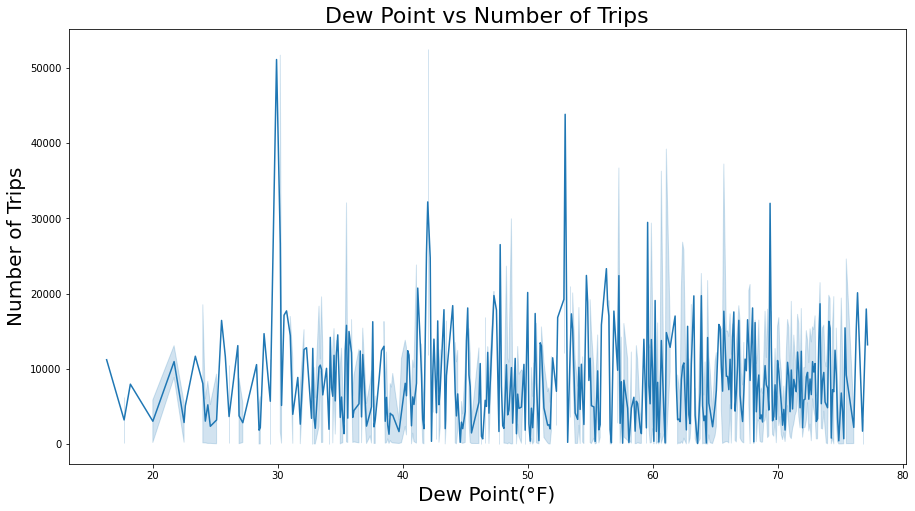

In [30]:
#plotting dew point vs number of trips
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=df_merged, x='Avg_DewPoint_F', y='num_trips',ax=ax)
#ax.set_xticks(AvgPrecep_data['Period'])
#ax.set_xticklabels(AvgPrecep_data['Month_Year'], rotation=45)
ax.set_xlabel("Dew Point(\xb0F)", fontsize=20)
#plt.legend()
plt.ylabel("Number of Trips", fontsize=20)
plt.title('Dew Point vs Number of Trips', fontsize=22)

Text(0.5, 1.0, 'Humidity vs Number of Trips')

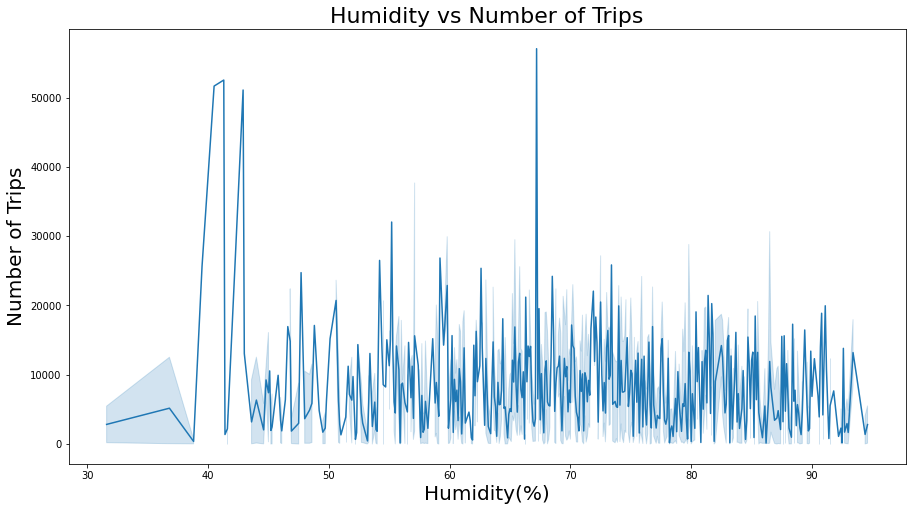

In [31]:
#plotting humidity vs number of trips
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=df_merged, x='Avg_Humidity_%', y='num_trips',ax=ax)
#ax.set_xticks(AvgPrecep_data['Period'])
#ax.set_xticklabels(AvgPrecep_data['Month_Year'], rotation=45)
ax.set_xlabel("Humidity(%)", fontsize=20)
#plt.legend()
plt.ylabel("Number of Trips", fontsize=20)
plt.title('Humidity vs Number of Trips', fontsize=22)

Text(0.5, 1.0, 'Wind Speed vs Number of Trips')

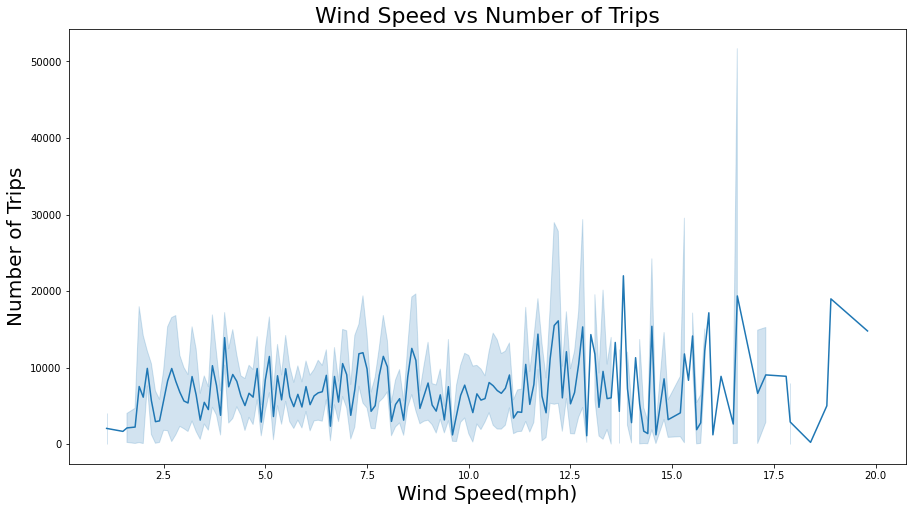

In [32]:
#plotting windspeed vs number of trips
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=df_merged, x='Avg_WindSpeed_mph', y='num_trips',ax=ax)
#ax.set_xticks(AvgPrecep_data['Period'])
#ax.set_xticklabels(AvgPrecep_data['Month_Year'], rotation=45)
ax.set_xlabel("Wind Speed(mph)", fontsize=20)
#plt.legend()
plt.ylabel("Number of Trips", fontsize=20)
plt.title('Wind Speed vs Number of Trips', fontsize=22)

Text(0.5, 1.0, 'Pressure vs Number of Trips')

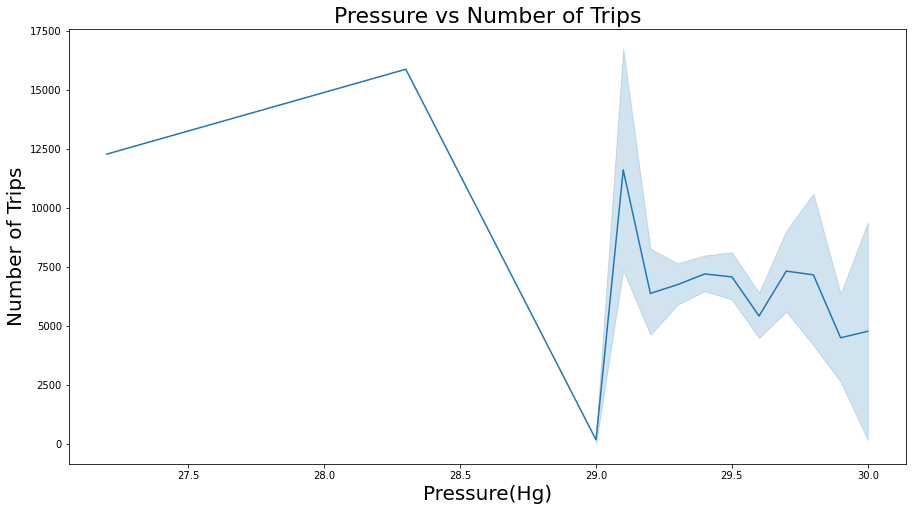

In [35]:
#plotting pressure vs number of trips
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=df_merged, x='Avg_Pressure_Hg', y='num_trips',ax=ax)
#ax.set_xticks(AvgPrecep_data['Period'])
#ax.set_xticklabels(AvgPrecep_data['Month_Year'], rotation=45)
ax.set_xlabel("Pressure(Hg)", fontsize=20)
#plt.legend()
plt.ylabel("Number of Trips", fontsize=20)
plt.title('Pressure vs Number of Trips', fontsize=22)